In [1]:
import os

from google.colab import drive

INIT=True
PATH="/content"

if INIT:
  drive.mount('/content/drive')
  ! pip install kaggle

  !mkdir ~/.kaggle


  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [2]:
!pip install keras==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 46.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


In [3]:
import keras
keras.__version__

'3.2.1'

In [4]:
import os
os.environ["KERAS_BACKEND"] = "jax"

import gc
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

import tensorflow as tf
import jax
import keras

from sklearn import metrics

from tqdm.notebook import tqdm

print(tf.__version__)
print(jax.__version__)

2.15.0
0.4.26


In [5]:
#from google.colab import auth
#auth.authenticate_user()
#!gcloud auth application-default login

In [6]:
! kaggle datasets download -d abiolatti/leap-train-tfrecords
! unzip -o  leap-train-tfrecords.zip -d    leap-train-tfrecords

Dataset URL: https://www.kaggle.com/datasets/abiolatti/leap-train-tfrecords
License(s): unknown
100% 26.7G/26.7G [25:17<00:00, 17.8MB/s]
100% 26.7G/26.7G [25:17<00:00, 18.9MB/s]
Archive:  leap-train-tfrecords.zip
  inflating: leap-train-tfrecords/train_000.tfrec  
  inflating: leap-train-tfrecords/train_001.tfrec  
  inflating: leap-train-tfrecords/train_002.tfrec  
  inflating: leap-train-tfrecords/train_003.tfrec  
  inflating: leap-train-tfrecords/train_004.tfrec  
  inflating: leap-train-tfrecords/train_005.tfrec  
  inflating: leap-train-tfrecords/train_006.tfrec  
  inflating: leap-train-tfrecords/train_007.tfrec  
  inflating: leap-train-tfrecords/train_008.tfrec  
  inflating: leap-train-tfrecords/train_009.tfrec  
  inflating: leap-train-tfrecords/train_010.tfrec  
  inflating: leap-train-tfrecords/train_011.tfrec  
  inflating: leap-train-tfrecords/train_012.tfrec  
  inflating: leap-train-tfrecords/train_013.tfrec  
  inflating: leap-train-tfrecords/train_014.tfrec  
  infla

In [7]:
! kaggle datasets download -d mpp1998/leap-percentiles-of-full-df
! unzip -o  leap-percentiles-of-full-df.zip -d    leap-percentiles-of-full-df

Dataset URL: https://www.kaggle.com/datasets/mpp1998/leap-percentiles-of-full-df
License(s): unknown
 83% 2.00M/2.42M [00:01<00:00, 2.14MB/s]
100% 2.42M/2.42M [00:01<00:00, 2.17MB/s]
Archive:  leap-percentiles-of-full-df.zip
  inflating: leap-percentiles-of-full-df/limits_train_percentiles.csv  
  inflating: leap-percentiles-of-full-df/myutils/constants.py  
  inflating: leap-percentiles-of-full-df/myutils/kaggle_metric_utilities.py  
  inflating: leap-percentiles-of-full-df/myutils/metric.py  
  inflating: leap-percentiles-of-full-df/percentiles.pkl  


In [8]:
df_limits = pd.read_csv("leap-percentiles-of-full-df/limits_train_percentiles.csv",index_col=0)
df_limits.sort_values(by="max") .head(50)

,max,min,q99,q01,std,mean
column,,,,,,
ptend_q0002_12,-2.147357e-53,-2.692638e-38,-1.062446e-48,-5.291556e-39,7.798521e-41,-2.113759e-41
ptend_q0002_6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_8,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ptend_q0002_17,0.000000e+00,-1.394760e-39,0.000000e+00,-5.596019e-56,1.369964e-43,-3.815392e-46
ptend_q0002_16,0.000000e+00,-1.959202e-44,0.000000e+00,0.000000e+00,1.684660e-48,-5.760587e-51
ptend_q0002_15,0.000000e+00,-6.381237e-48,0.000000e+00,0.000000e+00,3.346434e-52,-9.342572e-55


In [9]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [10]:
df_limits[["std","std"]].values

array([[  5.97902046,   5.97902046],
       [  8.15894896,   8.15894896],
       [  7.96972228,   7.96972228],
       ...,
       [116.33490848, 116.33490848],
       [ 46.37734006,  46.37734006],
       [ 29.67401422,  29.67401422]])

In [11]:
SEED = 42
keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
tf.config.experimental.enable_op_determinism()

In [12]:

DATA_TFREC = "drive/MyDrive/dataleap_tensors"

In [13]:
#project_id = 'midyear-data-392210'
#!gcloud config set project {project_id}

In [14]:
f__ = [e for e in df_limits.index]

In [15]:
#from google.cloud import storage
#bucket_name="dataleap_tensors"




#storage_client = storage.Client(project= 'midyear-data-392210')
#blobs = storage_client.list_blobs(bucket_name)
#files=  [b. name for b in blobs]

In [16]:
import glob
files= glob.glob("/content/drive/MyDrive/dataleap_tensors/*")

In [17]:
len(files), files[0]

(351,
 '/content/drive/MyDrive/dataleap_tensors/record_E3SM-MMF.mli.0001-02-08-19200.tfrec')

In [18]:
BATCH_SIZE = 1024*4

In [19]:
DATA_TFREC_LOCAL= "leap-train-tfrecords"

In [20]:
import tensorflow as tf
import os

# Define the GCS path to your TFRecord files
DATA_TFREC = ""



train_files = [os.path.join(DATA_TFREC, file) for i,file in enumerate(files) if i not in [10,30,50,70]]
#valid_files = [os.path.join(DATA_TFREC, file) for i,file in enumerate(files) if i    in [10,30,50,70]]

valid_files = [os.path.join(DATA_TFREC_LOCAL, "train_%.3d.tfrec" % i) for i  in [10,30,50,70]]


# Function to parse a single example from the TFRecord file
#TFRecords boilerplate
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[np.float32(value)]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def serialize_example(feats):
    """
    Creates a tf.train.Example message ready to be written to a file.
    """
    # Create a dictionary mapping the feature name to the tf.train.Example-compatible
    # data type.
    feature = {
       (f__)[i]: _float_feature(feats[i]) for i in range(len(feats))
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()


def _parse_function1(proto):
    # Define your feature description dictionary according to your TFRecord structure
    feature_description = {
          'features': tf.io.FixedLenFeature([556], tf.float32),
          'targets': tf.io.FixedLenFeature([368], tf.float32),
        # Add more features here
    }
    e =  tf.io.parse_single_example(proto, feature_description)

    return e["features"],e["targets"]

def _parse_function2(proto):
    # Define your feature description dictionary according to your TFRecord structure
    feature_description = {
          'x': tf.io.FixedLenFeature([556], tf.float32),
          'targets': tf.io.FixedLenFeature([368], tf.float32),
        # Add more features here
    }
    e =  tf.io.parse_single_example(proto, feature_description)

    return e["x"],e["targets"]

In [21]:
dataset=tf.data.Dataset.range(1,6)
dataset=dataset.interleave(lambda x:tf.data.Dataset.from_tensors(x).repeat(1),cycle_length=2,block_length=2)
list(dataset.as_numpy_iterator())

[1, 2, 3, 4, 5]

In [22]:
len(train_files),len(valid_files)

(347, 4)

In [23]:



# Define options for the training dataset
train_options = tf.data.Options()
train_options.deterministic = True

# Create the training dataset
ds_train = (
    tf.data.Dataset.from_tensor_slices(train_files)
    .with_options(train_options)
    .shuffle(100)
    .interleave(
        lambda file: tf.data.TFRecordDataset(file).map(_parse_function1, num_parallel_calls=tf.data.AUTOTUNE),
        num_parallel_calls=tf.data.AUTOTUNE,
        cycle_length=10,
        block_length=1000,
        deterministic=True
    )
    .shuffle(4 * BATCH_SIZE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# Create the validation dataset
ds_valid = (
    tf.data.Dataset.from_tensor_slices(valid_files)
    .interleave(
        lambda file: tf.data.TFRecordDataset(file).map(_parse_function2, num_parallel_calls=tf.data.AUTOTUNE),
        num_parallel_calls=tf.data.AUTOTUNE,
        cycle_length=1,
        block_length=1,
        deterministic=True
    )
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# Print the first batch from the training dataset to verify
for batch in ds_train.take(1):
    print(batch)

# Print the first batch from the validation dataset to verify
for batch in ds_valid.take(1):
    print(batch)

(<tf.Tensor: shape=(4096, 556), dtype=float32, numpy=
array([[2.0811687e+02, 2.1611015e+02, 2.2615208e+02, ..., 4.9085838e-07,
        4.9085838e-07, 4.9085838e-07],
       [2.2637869e+02, 2.3843889e+02, 2.4965488e+02, ..., 4.9085838e-07,
        4.9085838e-07, 4.9085838e-07],
       [2.1448253e+02, 2.2208784e+02, 2.3537958e+02, ..., 4.9085838e-07,
        4.9085838e-07, 4.9085838e-07],
       ...,
       [2.1224590e+02, 2.1635777e+02, 2.2763045e+02, ..., 4.9085838e-07,
        4.9085838e-07, 4.9085838e-07],
       [2.0935466e+02, 2.1541896e+02, 2.3077347e+02, ..., 4.9085838e-07,
        4.9085838e-07, 4.9085838e-07],
       [2.1548891e+02, 2.2517906e+02, 2.3520363e+02, ..., 4.9085838e-07,
        4.9085838e-07, 4.9085838e-07]], dtype=float32)>, <tf.Tensor: shape=(4096, 368), dtype=float32, numpy=
array([[ 4.1083156e-05,  4.8139209e-05,  6.5826993e-05, ...,
         2.6859735e+02,  7.6250557e+01,  2.0539955e+01],
       [ 2.4802850e-05,  1.1078765e-05,  1.2955485e-05, ...,
         7.3

In [24]:
#norm_x = keras.layers.Normalization()
#norm_x.adapt(ds_train.map(lambda x, y: x) )


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
if False:
  with open("drive/MyDrive/norm_x_mean.npy","wb") as file:
      np.save(file,norm_x.mean.numpy())

  with open("drive/MyDrive/norm_x_variance.npy","wb") as file:
      np.save(file,norm_x.variance.numpy())

  with open("drive/MyDrive/norm_y_mean.npy","wb") as file:
      np.save(file,norm_y.mean.numpy())

  with open("drive/MyDrive/norm_y_variance.npy","wb") as file:
      np.save(file,norm_y.variance.numpy())

In [27]:
with open("drive/MyDrive/norm_x_mean.npy","rb") as file:
   norm_x_mean= np.load(file)

with open("drive/MyDrive/norm_x_variance.npy","rb") as file:
   norm_x_variance= np.load(file)

with open("drive/MyDrive/norm_y_mean.npy","rb") as file:
    norm_y_mean= np.load(file)

with open("drive/MyDrive/norm_y_variance.npy","rb") as file:
     norm_y_variance= np.load(file)

In [28]:


mean_y =tf.constant(norm_y_mean)
stdd_y = keras.ops.maximum(1e-10,tf.constant(norm_y_variance) ** 0.5)



### Model definition & Training

In [29]:
import jax.numpy as jnp
import keras

In [30]:
@keras.saving.register_keras_serializable(package="MyMetrics", name="ClippedR2Score")
class ClippedR2Score(keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.base_metric = keras.metrics.R2Score(class_aggregation=None)

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.base_metric.update_state(y_true, y_pred, sample_weight=None)

    def result(self):
        return keras.ops.mean(keras.ops.clip(self.base_metric.result(), 0.0, 1.0))

    def reset_states(self):
        self.base_metric.reset_states()

In [31]:
@keras.saving.register_keras_serializable()


def r2_mult_keras(y_true, y_pred):

    SS_res =  tf.reduce_sum((y_true - y_pred),axis=0)
    SS_tot = tf.reduce_sum((y_true - tf.reduce_mean(y_true, axis=0 )),axis=0)
    vals = 1 - SS_res/(SS_tot+0.00000000001)
    vals_clipped = tf.where(vals < 0, tf.zeros_like(vals), vals)


    return     tf.reduce_mean(vals_clipped )

In [32]:
(len(train_files) * 200_000 / BATCH_SIZE)

16943.359375

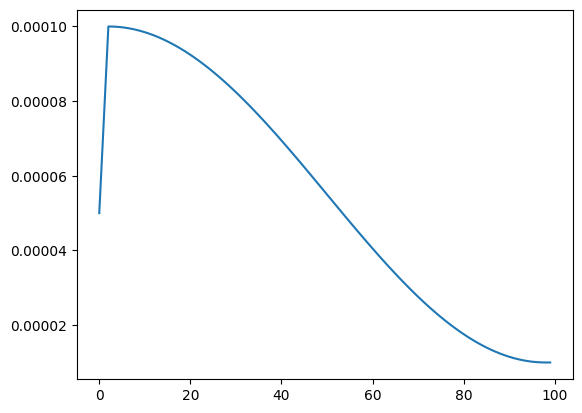

In [33]:
epochs = 100  # 25  # 15  # 12
learning_rate = 1e-4

epochs_warmup = 2
epochs_ending = 2
steps_per_epoch =int(np.floor(len(train_files) * 200_000 / BATCH_SIZE))
lr_scheduler = keras.optimizers.schedules.CosineDecay(
    5e-5,
    (epochs - epochs_warmup - epochs_ending) * steps_per_epoch,
    warmup_target=learning_rate,
    warmup_steps=steps_per_epoch * epochs_warmup,
    alpha=0.1
)

plt.plot([lr_scheduler(it) for it in range(0, epochs * steps_per_epoch, steps_per_epoch)]);

In [34]:
steps_per_epoch

16943

In [35]:
keras.__version__

'3.2.1'

In [36]:
keras.utils.clear_session()


def x_to_seq(x):
    x_seq0 = keras.ops.transpose(keras.ops.reshape(x[:, 0:60 * 6], (-1, 6, 60)), (0, 2, 1))
    x_seq1 = keras.ops.transpose(keras.ops.reshape(x[:, 60 * 6 + 16:60 * 9 + 16], (-1, 3, 60)), (0, 2, 1))
    x_flat = keras.ops.reshape(x[:, 60 * 6:60 * 6 + 16], (-1, 1, 16))
    x_flat = keras.ops.repeat(x_flat, 60, axis=1)
    return keras.ops.concatenate([x_seq0, x_seq1, x_flat], axis=-1)


def build_cnn(activation='relu'):
    return keras.Sequential([
        keras.layers.Conv1D(512, 3, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(256, 5, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
        keras.layers.Conv1D(128, 7, padding='same', activation=activation),
        keras.layers.BatchNormalization(),
    ])


X_input = x = keras.layers.Input(ds_train.element_spec[0].shape[1:])
x = keras.layers.Normalization(mean=tf.constant( norm_x_mean), variance=tf.constant( norm_x_variance))(x)
x = x_to_seq(x)


e = e0 = keras.layers.Conv1D(128, 1, padding='same')(x)
e = build_cnn()(e)
# add global average to allow some comunication between all levels even in a small CNN
e = e0 + e + keras.layers.GlobalAveragePooling1D(keepdims=True)(e)
e = keras.layers.BatchNormalization()(e)
e = e + build_cnn()(e)


p_all = keras.layers.Conv1D(14, 1, padding='same')(e)

p_seq = p_all[:, :, :6]
p_seq = keras.ops.transpose(p_seq, (0, 2, 1))
p_seq = keras.layers.Flatten()(p_seq)
assert p_seq.shape[-1] == 360

p_flat = p_all[:, :, 6:6 + 8]
p_flat = keras.ops.mean(p_flat, axis=1)
assert p_flat.shape[-1] == 8

P = keras.ops.concatenate([p_seq, p_flat], axis=1)

# build & compile
model = keras.Model(X_input, P)
model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(lr_scheduler),
    metrics=[ClippedR2Score()]
)
model.build(tuple(ds_train.element_spec[0].shape))
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 556)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 556)            │              0 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 360)            │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 180)            │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 16)             │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 6, 60)          │              0 │ get_item[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 3, 60)          │              0 │ get_item_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 1, 16)          │              0 │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transpose (Transpose)     │ (None, 60, 6)          │              0 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transpose_1 (Transpose)   │ (None, 60, 3)          │              0 │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat (Repeat)           │ (None, 60, 16)         │              0 │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 60, 25)         │              0 │ transpose[0][0],       │
│                           │                        │                │ transpose_1[0][0],     │
│                           │                        │                │ repeat[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 60, 128)        │          3,328 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 60, 128)        │      1,085,824 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 60, 128)        │              0 │ conv1d[0][0],          │
│                           │                        │                │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 1, 128)         │              0 │ sequential[0][0]       │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 60, 128)        │              0 │ add[0][0],             │
│                      

 Total params: 2,177,294 (8.31 MB)

 Trainable params: 2,173,454 (8.29 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [37]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [38]:
model = keras.models.load_model("drive/MyDrive/large_dataset_v7.keras")

In [ ]:
ds_train_target_normalized = ds_train.map(lambda x, y: (x, (y - mean_y) / stdd_y))
ds_valid_target_normalized = ds_valid.map(lambda x, y: (x, (y - mean_y) / stdd_y))

history = model.fit(
    ds_train_target_normalized,
    validation_data=ds_valid_target_normalized,
    epochs=epochs,
    verbose=1,
    callbacks=[
        keras.callbacks.ModelCheckpoint(filepath='model.keras')
    ]
)

Epoch 1/100
  16949/Unknown 5904s 347ms/step - loss: 0.2399 - r2_score: 0.5361

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


16949/16949 ━━━━━━━━━━━━━━━━━━━━ 5917s 348ms/step - loss: 0.2399 - r2_score: 0.5361 - val_loss: 0.2341 - val_r2_score: 0.5288
Epoch 2/100
16949/16949 ━━━━━━━━━━━━━━━━━━━━ 6068s 357ms/step - loss: 0.2405 - r2_score: 0.5371 - val_loss: 0.2329 - val_r2_score: 0.5300
Epoch 3/100
16949/16949 ━━━━━━━━━━━━━━━━━━━━ 7149s 420ms/step - loss: 0.2377 - r2_score: 0.5375 - val_loss: 0.2319 - val_r2_score: 0.5310
Epoch 4/100
16949/16949 ━━━━━━━━━━━━━━━━━━━━ 6257s 369ms/step - loss: 0.2375 - r2_score: 0.5387 - val_loss: 0.2321 - val_r2_score: 0.5300
Epoch 5/100
16949/16949 ━━━━━━━━━━━━━━━━━━━━ 5977s 351ms/step - loss: 0.2387 - r2_score: 0.5379 - val_loss: 0.2323 - val_r2_score: 0.5307
Epoch 6/100
16949/16949 ━━━━━━━━━━━━━━━━━━━━ 6400s 377ms/step - loss: 0.2394 - r2_score: 0.5385 - val_loss: 0.2319 - val_r2_score: 0.5314
Epoch 7/100
16949/16949 ━━━━━━━━━━━━━━━━━━━━ 6358s 374ms/step - loss: 0.2360 - r2_score: 0.5395 - val_loss: 0.2294 - val_r2_score: 0.5338
Epoch 8/100
16949/16949 ━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
tf.__version__

In [ ]:
plt.plot(history.history['loss'], color='tab:blue')
plt.plot(history.history['val_loss'], color='tab:red')
plt.yscale('log');

In [ ]:
y_valid = np.concatenate([yb for _, yb in ds_valid])
p_valid = model.predict(ds_valid, batch_size=BATCH_SIZE) * stdd_y + mean_y

In [ ]:
scores_valid = np.array([metrics.r2_score(y_valid[:, i], p_valid[:, i]) for i in range(len(TARGETS))])
plt.plot(scores_valid.clip(-1, 1))

In [ ]:
import numpy as np

In [ ]:
with open(f"scores.npy","wb") as file:
    np.save(file,scores_valid)

In [ ]:
mask = scores_valid <= 1e-3
f"Number of under-performing targets: {sum(mask)}"

In [ ]:
f"Clipped score: {scores_valid.clip(0, 1).mean()}"

In [ ]:
del y_valid, p_valid
gc.collect();

# Submission

In [ ]:
sample = pl.read_csv("/kaggle/input/leap-atmospheric-physics-ai-climsim/sample_submission.csv")

In [ ]:
df_test = (
    pl.scan_csv("/kaggle/input/leap-atmospheric-physics-ai-climsim/test.csv")
    .select(pl.exclude("sample_id"))
    .cast(pl.Float32)
    .collect()
)

In [ ]:
p_test = model.predict(df_test.to_numpy(), batch_size=4 * BATCH_SIZE) * stdd_y + mean_y
p_test = np.array(p_test)
p_test[:, mask] = mean_y[:, mask]

In [ ]:
# correction of ptend_q0002 targets (from 12 to 29)
df_p_test = pd.DataFrame(p_test, columns=TARGETS)

for idx in range(12, 30):
    df_p_test[f"ptend_q0002_{idx}"] = -df_test[f"state_q0002_{idx}"].to_numpy() / 1200

p_test = df_p_test.values

In [ ]:
submission = sample.to_pandas()
submission[TARGETS] = submission[TARGETS] * p_test
pl.from_pandas(submission[["sample_id"] + TARGETS]).write_csv("submission.csv")